# Audio-Processing: 101 - Baby Steps

<a id="0"></a> <br>
 # Table of Contents  
1. [Onda Sonora](#1)
    1. [Audio Digital](#2)
2. [Gerando uma onda senóide](#3)
3. [Primeira Intuição](#4)
4. [Taxa de Amostragem](#5)
    1. [Frequências mais comuns](#6)
5. [Volume](#7)
6. [Tonalidade](#8)
7. [Bit Depth](#9)
8. [Bit Rate](#10)
9. [Duração](#11)
10. [Frames](#12)
11. [Canais e Trilhas de audio](#13)
12. [Salvando um arquivo PCM raw](#14)
12. [Validando as informações no ffprobe](#15)
12. [Convertedo para wav](#16)
13. [Abrindo um arquivo wave](#17)


#### Introdução

<a id="1"></a>

##### Onda Sonora
É a propagação de uma "onda mecânica acustica", longitudinal(**1) de forma cincuncêntrica, essa onda viaja somente por meios materiais (sólidos, liquidos ou gasosos). [wiki Ondas_longitudinais](https://pt.wikipedia.org/wiki/Ondas_longitudinais)

[visualizando frequeências de audio na água](https://www.youtube.com/watch?v=Q3oItpVa9fs)


Quando os nossos ouvidos captam um som, e depois desse som ser processado pelo no nosso cérebro, podemos ter o desejo de ouvi-lo novamente, e a qualquer momento. Isso só será possível através de uma gravação.

Para isso, essa onda sonora precisa ser capturada, processada e depois armazenada. O equipamento utilizado para converter sinal analógico em sinal digital é chamado conversor AD.


| origem | https://e2e.ti.com/search?q=ADS112U04 |  |
| ---------------- | ---------------- | ---------------- |
| conversor AD | ![Conversor AD](pictures/ad.png) | ![ADS112U04](pictures/ADS112U04.jpg) | |

<p></p>

O Conversor processa uma amostra do som a uma taxa de dezenas de milhares de vezes por segundo.
Nesse processo de conversão o audio sofre perdas, quando convertido do domínio continuo(infinito) para o discreto(finito) e dessa forma pode ser armazenado.
Esse processo de conversão atingiu um grau elevado de precisão que essa perda não é percebida.

![continuous vs discrete](pictures/cont_desc.jpg)

<a id="2"></a>

##### Audio Digital

* Audio digital, consiste na representação digital de uma onda sonora por meio de uma sequência binaria.
  * Aplicação: Armazenamento e reprodução por meio de diversas midias: cd, internet, wav, mp3.
* Com a conversão do analógico para o digital nasceu o Processamento de Sinais Digitais, DSP. Digital Signal Processing.
* O que é processamento de sinais de audio?
  * é toda alteração intencional em um sinal de audio.

Exemplos de aplicações:

* sintese sonora (Sound Syntesis)
  * É a criação artificial de um sinal de audio, você pode reproduzir um som da natureza, um instrumento musical

![wavetables](pictures/wavetable.gif)

  
* Compressão de Audio
  * Algoritmos de Compressão podem reduzir  o tamanho dos arquivos sem comprometer a qualidade. mp3, aac, vorbis. ou o Flac sem perda.

![continuous vs discrete](pictures/audio_formats.jpg)

* Filtros
  * Tecnica usada para modificar a frequencia de um audio.
    A equalização é um tipo básico de filtro, é possível ajustar a frequencia de vários componentes do audio, como os médios, graves e agudos.
* Efeitos de Audio
  reverb, delay, flanger, chorus.



|  |  |
| ---------------- | ---------------- |
| guitar synth | ![efeitos de guiarra](pictures/guitar-synthesizer.png) |


<p></p>

* Processamentos de Voz
  * Afinar a voz em tempo real
  * clonar uma pessoa.

|                |                                       |
| ---------------- | --------------------------------------- |
| voice auto tune | ![efeitos de guiarra](pictures/autotune.png) |

Além de Sound synthesis na área musical e Voice synthesis na área de inteligência artificial, o estudo e o desenvolvimento de ferramentsas para audio podem contribuir em muitas outras áreas como:


* Melhoria na Qualidade( Audio Enhancement )
    * Telecomunicações

* Efeitos
    * Cinema
    * Games

* Streaming
    * Novos codecs de audio

* Compressão
    * Novos algorítmos e técnicas de compressão

* Simulação
    * Acustica
    * Comportamento da Onda
 
* Embarcados
    * Desenvolvimento de drivers
    * Segurança
    * Área médica

#### Simulando a conversão Analógica/Digital

<a id="3"></a>

##### Gerando uma onda senoide

In [2]:
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import Output, GridspecLayout
import numpy as np

In [3]:
amplitude = .8
frequencia = 2
fase_inicial = np.pi/2
taxa_amostragem = 100

tempo = np.arange(-1, 1, 1.0/taxa_amostragem)

x = amplitude * np.sin(2*np.pi*frequencia*tempo+fase_inicial)

%%latex
$$
x(t) = 0.8 \sin(2\pi f t + \frac{\pi}{2})
$$

%%latex

Given:

Amplitude: 
$A = 0.8$

Frequency: 
$f = 2$

Initial Phase: 
$\phi_0 = \frac{\pi}{2}$

Sampling Rate: 
$f_s = 100$

Time: 
$t$ ranging from -1 to 1 at a sampling rate of 100 samples per second ($t = -1, -0.99, -0.98, ..., 0.99$)

The mathematical formula for $x$, which represents the sinusoidal signal, is:

$$
x(t) = 0.8 \sin(2\pi f t + \frac{\pi}{2})
$$

Where:

$A$ is the amplitude,

$f$ is the frequency,

$t$ is time, and

$\phi_0$ is the initial phase.


%%end


Trocando em miudos como as ondas são circuncêntricas precisamos da função seno que vai nos retornar seno de um ângulo gerando uma curva senoidal a cada posição no tempo.

Text(0, 0.5, 'amplitude')

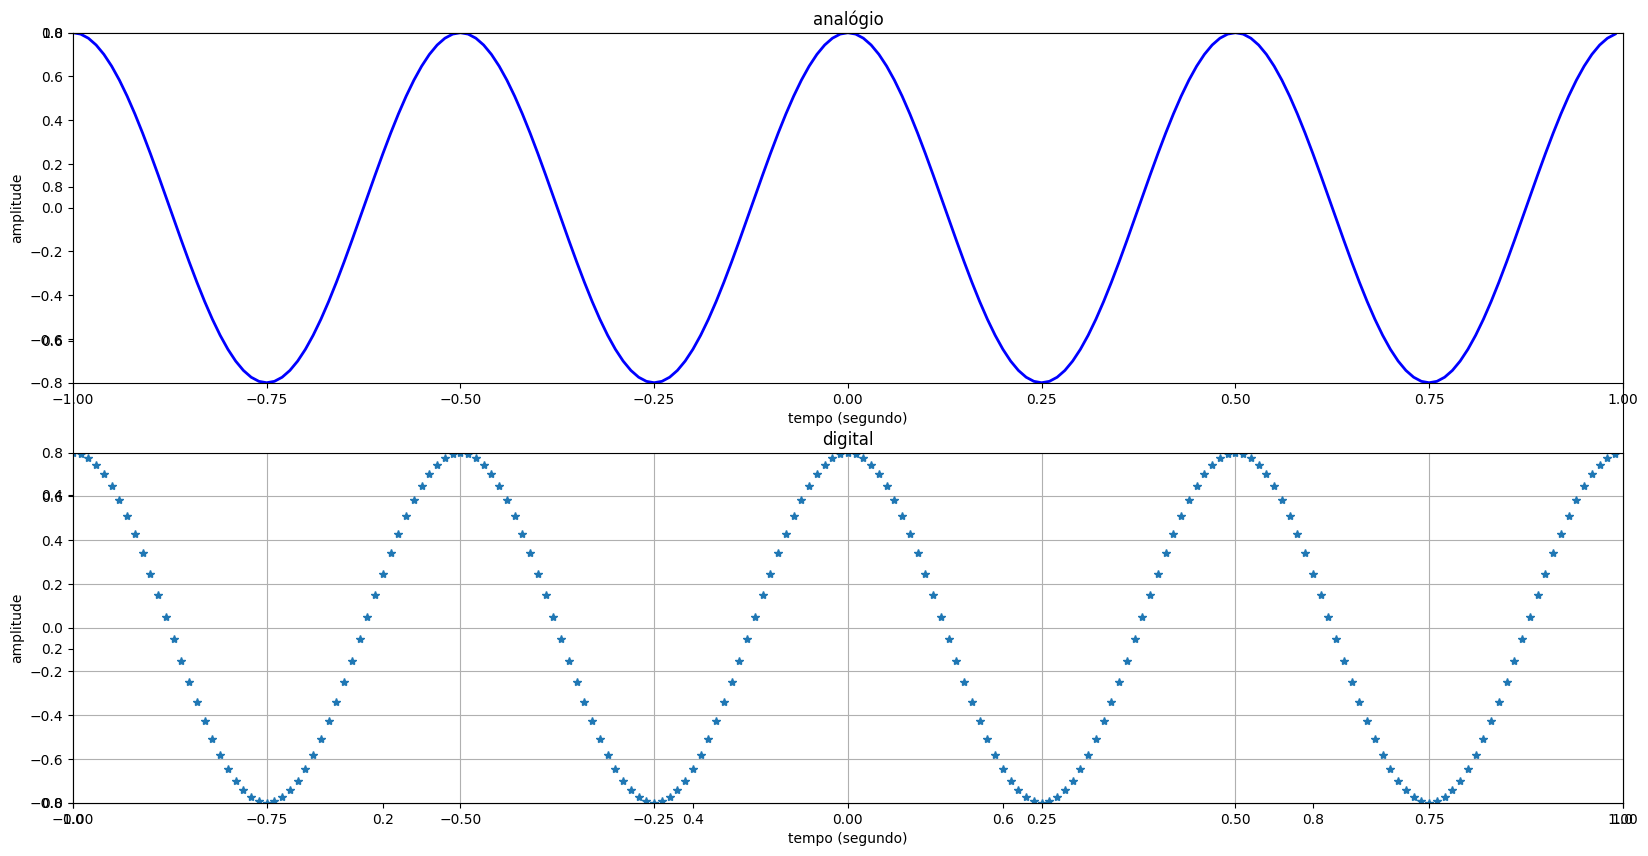

In [4]:
plt.subplots(figsize=(20, 10))

ax1=plt.subplot(2, 1, 1)
ax1.plot(tempo, x, 'b',lw=2)
plt.axis([-1,1,-0.8,0.8])
ax1.set_title('analógio')
ax1.set_xlabel('tempo (segundo)')
ax1.set_ylabel('amplitude')

ax2=plt.subplot(212, sharex=ax1)
ax2.plot(tempo, x, '*', lw=2)
plt.axis([-1,1,-0.8,0.8])
plt.grid(True)
plt.title('digital')
plt.xlabel('tempo (segundo)')
plt.ylabel('amplitude')

<a id="4"></a>

## Primeira Intuição

|                |                                       |
| ---------------- | --------------------------------------- |
| **First Step** | ![primeiro passo](pictures/step.jpeg) |

<p></p>

> ### Algumas das propriedades do Audio Digital
>
> 1. Taxa de Amostragem (Sample Rate)
> 2. Volume
> 3. Tonalidade (Pitch)
> 4. Duração
<p></p>

----------

<p></p>

> 5. Quantidade de bits (Bit Depth)
> 6. Taxa de Bits (Bit Rate)
> 7. Armazenamento x estrutura de dados
> 8. Frame x Sample x Chunk Size


<a id="5"></a>

### Taxa de amostragem -  Sample Rate (sample frequency)

<p>Uma amostra ou sample é o estado original analógico da onda sonora em um certo periodo do tempo</p>
<p>Uma série de amostras conectadas descrevem um trecho de audio</p>

> Taxa de amostragem é o número de amostras por uma medida de tempo(normalmente em segundos), quando estamos captando um sinal continuo e analógio para um sinal discreto e digital.

A `taxa de amostragem` também é chamada de:
  - Frequencia de amostragem(samplig rate)
  - Taxa de recuperação(recevery rate). 
  - Normalmente medido em HZ hertz. **41.200Hz**

In [5]:
amplitude = .8
frequencia = 440
fase_inicial = np.pi
duracao = 1

taxa_amostragem = 44100
tempo1 = np.arange(start=0, stop=duracao, step=duracao/taxa_amostragem, dtype=np.float32)
tempo2 = np.linspace(start=0, stop=duracao, num=duracao*taxa_amostragem, endpoint=False, dtype=np.float16)

x1 = amplitude * np.sin(2 * np.pi * frequencia * tempo1 + fase_inicial)
x2 = amplitude * np.sin(2 * np.pi * frequencia * tempo2 + fase_inicial)

print(len(tempo1))
print(len(tempo2))

44100
44100


Text(0, 0.5, 'amplitude')

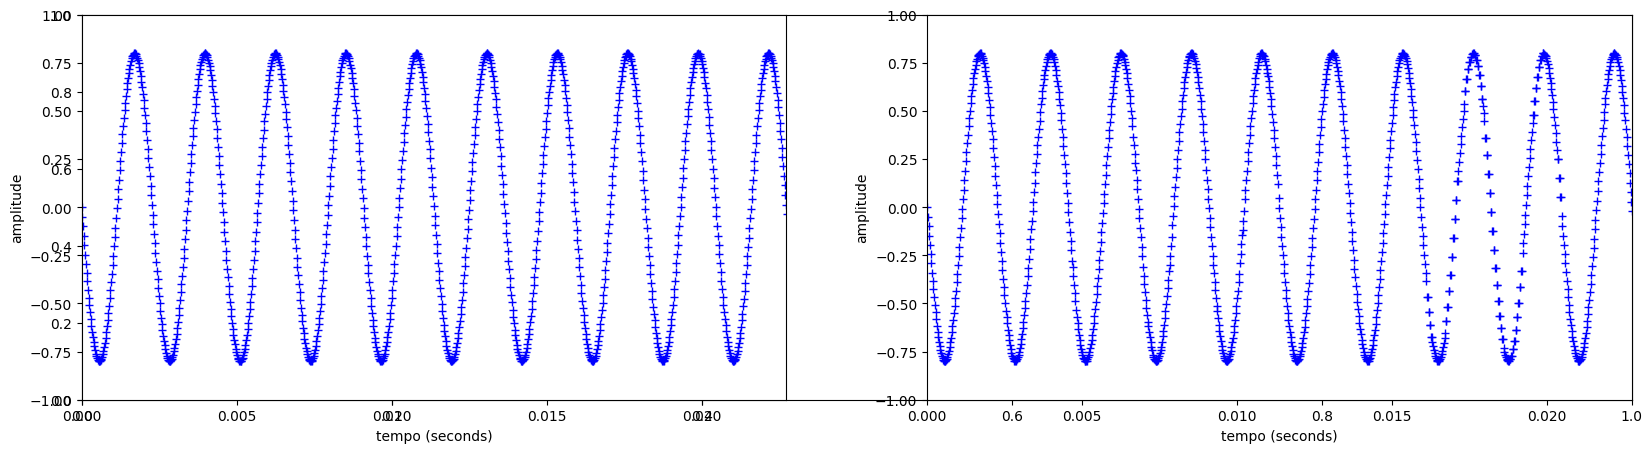

In [6]:
plt.subplots(figsize=(20, 5))
plt.subplot(1,2,1)
plt.plot(tempo1, x1, 'b+', linewidth=2)
plt.axis([-.0, 1/44, -1.0, 1.0])
plt.xlabel('tempo (seconds)')
plt.ylabel('amplitude')

plt.subplot(1,2,2)
plt.plot(tempo2, x2, 'b+', linewidth=2)
plt.axis([-.0, 1/44, -1.0, 1.0])
plt.xlabel('tempo (seconds)')
plt.ylabel('amplitude')


In [7]:
import IPython.display as ipd

ipd.display(ipd.Audio(data=x1, rate=taxa_amostragem))
ipd.display(ipd.Audio(data=x2, rate=taxa_amostragem))

In [8]:
def draw_wave(tempo, audio, style, duracao, zoom, amplitude):
    plt.plot(tempo, audio, style, linewidth=2)
    plt.axis([-.0, duracao/zoom, -amplitude, amplitude])
    plt.xlabel('tempo (seconds)')
    plt.ylabel('amplitude')

In [9]:
def create_audio(amplitude, frequencia, fase_inicial, duracao, taxa_amostragem):
    vetor_tempo = np.linspace(start=0, stop=duracao, num=duracao*taxa_amostragem, endpoint=False)
    two_phi = 2 * np.pi

    x = amplitude * np.sin( two_phi * frequencia * vetor_tempo + fase_inicial)
    return vetor_tempo, x

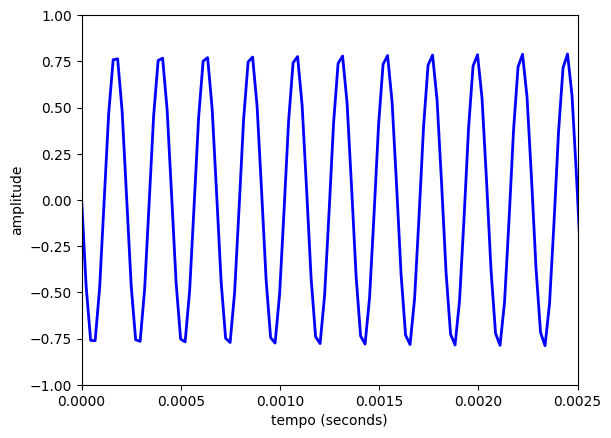

In [10]:
amplitude = .8
frequencia = 4400
fase_inicial = np.pi
duracao = 1
taxa_amostragem = 44100

tempo, audio = create_audio(amplitude, frequencia, fase_inicial, duracao, taxa_amostragem)
ipd.display(ipd.Audio(data=audio, rate=taxa_amostragem))
draw_wave(tempo, audio, 'b', duracao, 400, amplitude+.2)

<a id="6"></a>

#### Frequências mais comuns

| Sample Rate | Mais usado em | OBS |
| ------------- | ------------- | ------------- |
| 8.000 Hz    | ligações telefonicas, walkie-talkie, e transmissões wireless |  |
| 11.025 Hz   | format PCM de menor qualidade, áudio MPEG e análise de subfaixas de subwoofer | Um quarto da taxa de amostragem de CDs de áudio |
| 16.000 Hz   | Extensão da frequência de banda larga sobre o padrão de 8.000 Hz para telefones Usado na maioria dos produtos modernos |  |
| 22.050 Hz   | usado para PCM de menor qualidade, áudio MPEG e análise em baixa frequência | Metade da taxa de amostragem de CDs de áudio |
| 32.000 Hz   | Usado em videocassetes digitais miniDV, fitas de vídeo com canais adicionais de áudio, DAT (modo LP), microfones sem fio digitais de alta qualidade |  |
| 44.056 Hz   | Usado por áudio digital sincronizado a sinais de vídeo coloridos NTSC |  |
| 44.100 Hz   | Padrão para CD de áudio, também amplamente usado com áudio MPEG-1 (VCD, SVCD, MP3) |  |
| 48.000 Hz   | Taxa padrão de amostragem de áudio usada em equipamentos de vídeo digital profissional, como gravadores de fita, servidores de vídeo e mesas de mixagem. | Frequência comum em equipamentos de áudio profissional |

[wiki Sampling](https://en.wikipedia.org/wiki/Sampling_(signal_processing)

<a id="7"></a>

#### **Volume**

É a amplitude de uma onda sonora, uma amplituda alta, produz sons mais altos, enquanto baixas amplitudos sons mais baixos.


| origem | https://www.apple.com/ca/sound/ |
| ---------------- | --------------------------------------- |
| amplitude/volume | ![volume](pictures/sounddiagram.gif) |



In [11]:
seconds = 3.0
taxa_amostragem = 22050
tonalidade = 440

amplitude_variavel = np.logspace(-3, 0, int(seconds*taxa_amostragem), endpoint=False, base=10.0)

tempo_array = np.linspace(0, seconds, int(seconds*taxa_amostragem), endpoint=False)
audio = amplitude_variavel*np.sin(2* np.pi * tonalidade * tempo_array)

a função logspace vai gerar um espaço com valores de 0.001 até 1

Text(0, 0.5, 'amplitude')

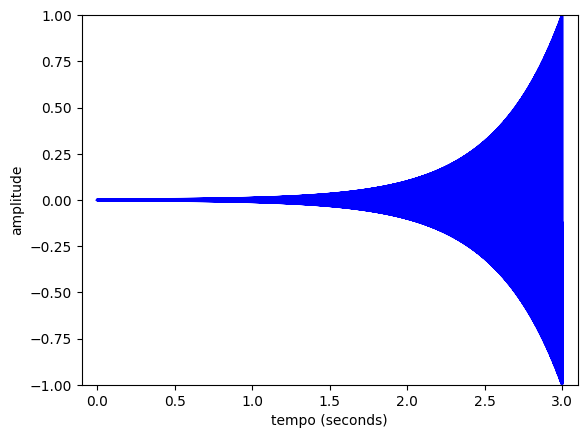

In [12]:
ipd.display(ipd.Audio(data=audio, rate=taxa_amostragem))

plt.plot(tempo_array, audio, 'b',lw=2)
plt.axis([-0.1, 3.1, -1.0, 1.0])
plt.xlabel('tempo (seconds)')
plt.ylabel('amplitude')


In [13]:
def compute_power_db(x, Fs, win_len_sec=0.1, power_ref=10**(-12)):
    win_len = round(win_len_sec * Fs)
    win = np.ones(win_len) / win_len
    power_db = 10 * np.log10(np.convolve(x**2, win, mode='same') / power_ref)
    return power_db

win_len_sec = 0.2
power_db = compute_power_db(audio, Fs=taxa_amostragem, win_len_sec=win_len_sec)

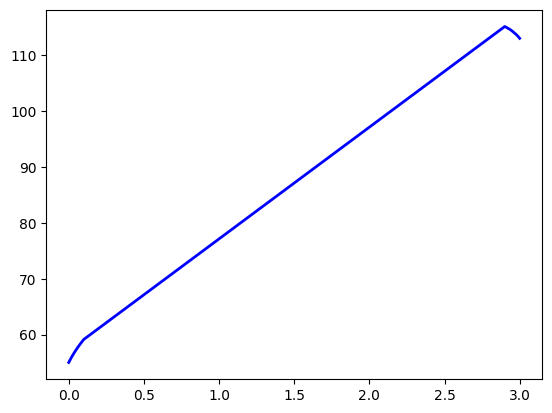

In [14]:
plt.plot(tempo_array, power_db, 'b',lw=2)

<a id="8"></a>

#### **Tonalidade** - Pitch

É a frequencia das ondas sonoras ou o número de ciclos por segundo medido em Hz. Frequencias mais altas produzem sons mais agudos, e baixas frequências produzem sons mais graves.

In [15]:
def draw_subplot(data1, x1, data2, x2):
    plt.subplots(figsize=(20, 5))
    plt.subplot(1,2,1)
    plt.plot(data1, x1, 'b+', linewidth=2)
    plt.axis([-.0, 1/100, -1.0, 1.0])
    plt.xlabel('tempo (seconds)')
    plt.ylabel('amplitude')

    plt.subplot(1,2,2)
    plt.plot(data2, x2, 'b+', linewidth=2)
    plt.axis([-.0, 1/100, -1.0, 1.0])
    plt.xlabel('tempo (seconds)')
    plt.ylabel('amplitude')

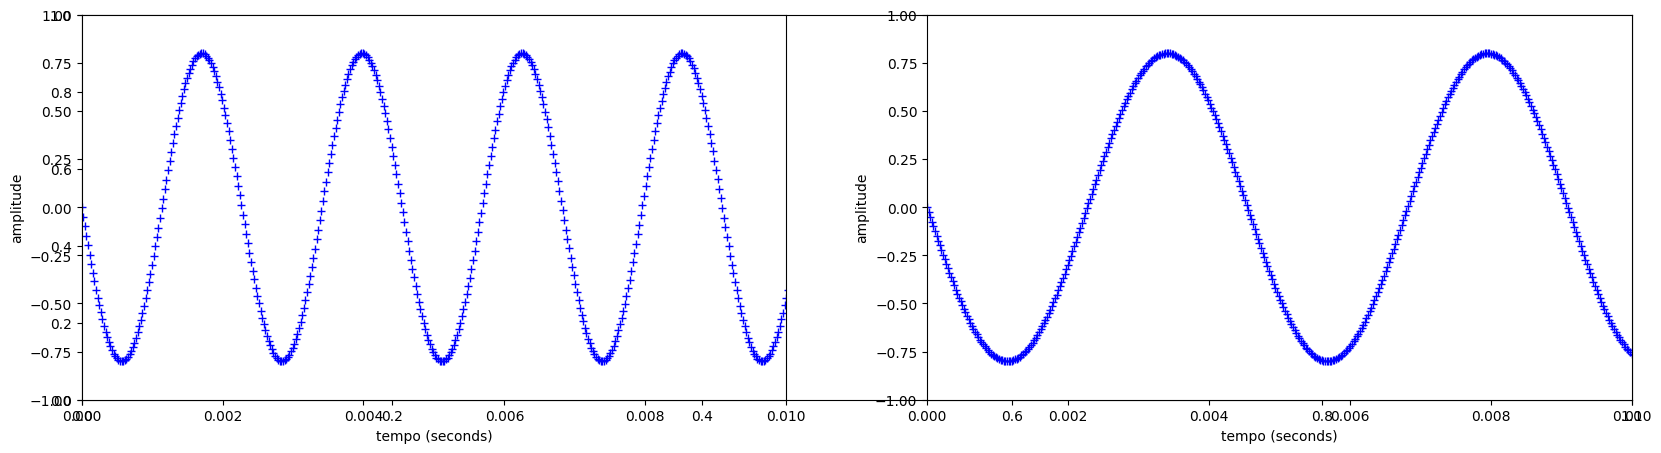

In [16]:
amplitude = .8
frequencia = 440
fase_inicial = np.pi
duracao = 1
taxa_amostragem = 44100

tempo1, audio1 = create_audio(amplitude, frequencia, fase_inicial, duracao, taxa_amostragem)
tempo2, audio2 = create_audio(amplitude, frequencia//2, fase_inicial, duracao, taxa_amostragem)

ipd.display(ipd.Audio(data=audio1, rate=taxa_amostragem))
ipd.display(ipd.Audio(data=audio2, rate=taxa_amostragem))
draw_subplot(tempo1, audio1, tempo2, audio2)

<a id="9"></a>

#### **Bit Depth** - Subchunk Size
  * Indica o número de bits usado para representar cada sample
  * Maiores valores de bit depth permitem uma representação maior da amplitude do audio
  * No pão nosso de cada dia significa as tipagens: int8, int16, int32, float16, float, double

<p> </p>

| Type | BIT Depth | # of possible values | min ~ max |
| ------ | ------ | ----------------------------------- | ------- |
| int/float | 32-bit | 4,294,967,296 | -2147483648 ~ +2147483647 |
| signed short | 16-bit | 65,536 | -32768 ~ +32767 |
| float16 | 16-bit | ??? | -1 ~ +1 |
| char | 8-bit | 256 | 0 ~ 255 |


<p></p>

| low BIT Depth | medium/high BIT Depth |
| ------ | ------ |
| ![low bit depth](pictures/bit_depth_1.png) | ![low bit depth](pictures/bit_depth_2.png) |



<a id="10"></a>

#### **Bit Rate**
É a quantidade de bits processados em uma unidade de tempo(segundos/minutos/horas)
Ele é o produto da taxa de amostragem, da profundidade de bits e do número de canais
normalmente representado em kbps ou Mbps

In [17]:
dtype = np.float16
sample_size_bytes = np.dtype(dtype).itemsize
print('16 bits', sample_size_bytes, 'bytes')

dtype = np.float32
sample_size_bytes = np.dtype(dtype).itemsize
print('32 bits', sample_size_bytes, 'bytes')

16 bits 2 bytes
32 bits 4 bytes


In [18]:
numero_canais = 1
milisegundos = 1000

bit_rate = (taxa_amostragem * 32 * numero_canais)/milisegundos
bit_rate

1411.2

<a id="11"></a>

#### **Duration**

É a duração total do arquivo em horas, minutos, segundos...

* Byte array for PCM data (PCM -> Pulse code modulation)
* duration = (byte_lenght * bit_depth) / bit_rate

In [19]:
bit_len = len(tempo1)*32
(bit_len / bit_rate)

1000.0

In [20]:
bit_rate2 = (taxa_amostragem * 16 * numero_canais)/milisegundos

bit_len = len(tempo2)*16
(bit_len / bit_rate2)

1000.0

<a id="12"></a>

#### **Samples e Frames**
<p>Sample é a menor porção de um audio, ele representa parte uma onda em um ponto específico do tempo. Se o bit-depth for um float16, então um sample tera 16bits</p>

<p> O Frame( sample frame ) é o conjunto de amostras de todos os canais em um ponto específico do tempo.</p>

> Frame possui um sample de cada canal.
  * Um Frame Stereo possui 2 samples, Um Frame 5.1 possui 6 samples.
  * Frame Size = bit_depth * channel_count
  <p></p>
  <p></p>

  > Se eu tenho 1 segundo de audio 44100hz mono, significa que eu tenho 44100 samples e 44100 frames.

  > Se eu tenho 1 segundo de audio 44100hz stereo, significa que eu tenho 88200 samples, mas o meu frame size ainda é 44100.
   * frames = 44100
   * samples = 88200
   * [basic-concepts](https://developer.mozilla.org/en-US/docs/Web/API/Web_Audio_API/Basic_concepts_behind_Web_Audio_API)

  ##### Chunk-size - ou buffer.
   São os dados que enviamos para a placa de audio. Normalmente os valores 512 e 1024 são escolhidos.
<p>
  Um valor menor resulta em menos latência entre as operações, mas se for muito pequeno teremos problemas
  com a taxa de transferência de áudio e o tamanho do barramento do dispositivo de áudio.</p>

> É importante definir um fps, ou quantas vezes por segundo o som será reproduzido.

<a id="13"></a>

#### **Canais e trilhas de audio**

##### Canais de audio
<p>Basicamente vamos falar sobre mono e stereo.</p>
<p>Canais de audio se referem ao número de sinais independentes dentro de um arquivo ou stream.</p>
<p>Em um arquivo de audio stereo temos dois canais esquerda e direita.</p>
<p>O número de canais determinam o aspecto spacial ou direcional do som. (origem e direção)</p>


##### Audio Tracks
<p>Se refere a separação lógica, uma trilha de audio é um container de dados, é muito usado como estrutura organizacional.</p>

 * Separar instrumentos em arquivos de audio
 * Separar idiomas em arquivos de video

 * Uma trilha de audio contém canais de audio, em um arquivo de video eu posso ter a seguinte separação lógica:
    - uma trilha pt-br stereo
    - uma trilha pt-br surround 5.1
    - uma trilha en-us stereo
    - uma trilha en-us surround 5.1

##### Organização em bits
<p>Para um som de um segundo a 44100Hz:</p>

* Um som mono vai ter 44100 frames( cada chunk-size de 1024 samples ) 44100/1024 = 43 fps
* Um som stereo vai ter 44100 frames( cada chunk-size de 2048 samples ) 88200/2048 = 43 fps

- TODO: colocar a formula com exemplo do bit-rate com a frequência

In [21]:
amplitude = .8
la = 440.00
mi = 329.63
fase_inicial = np.pi
duracao = 1
taxa_amostragem = 44100

left_time, left_audio = create_audio(amplitude, la, fase_inicial, duracao, taxa_amostragem)
right_time, right_audio = create_audio(amplitude, mi, fase_inicial, duracao, taxa_amostragem)

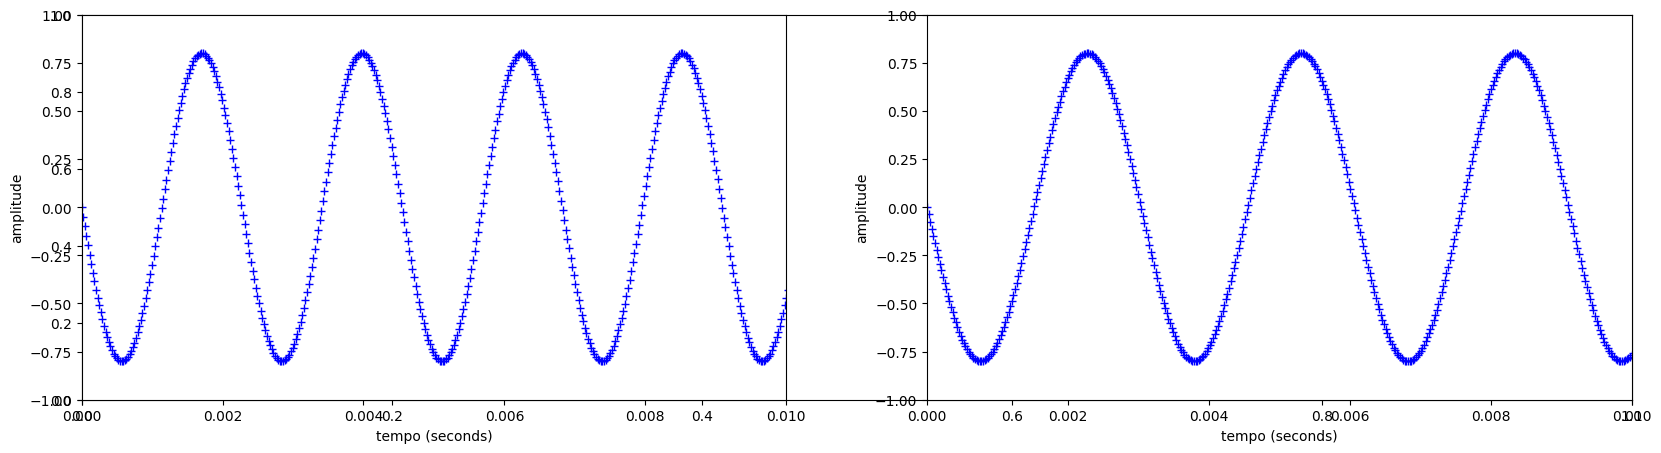

In [22]:
ipd.display(ipd.Audio(data=left_audio, rate=taxa_amostragem))
ipd.display(ipd.Audio(data=right_audio, rate=taxa_amostragem))

draw_subplot(left_time, left_audio, right_time, right_audio)

In [22]:
ipd.display(ipd.Audio(data=[left_audio, right_audio], rate=taxa_amostragem))

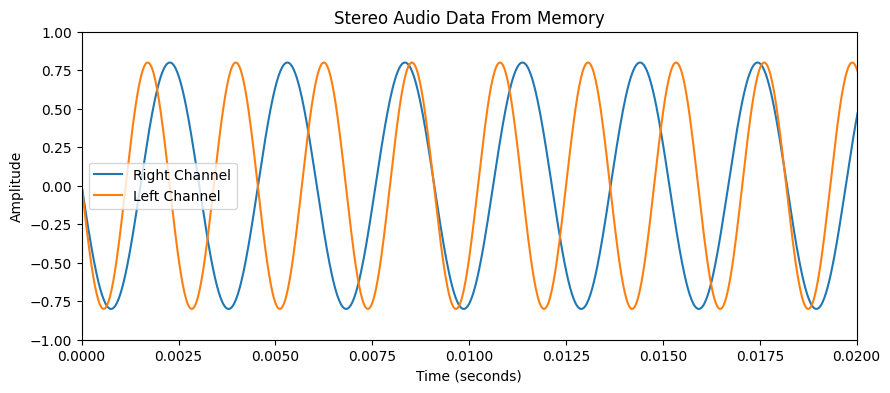

In [23]:
plt.figure(figsize=(10, 4))
plt.plot(right_time, right_audio, label='Right Channel')
plt.plot(left_time, left_audio, label='Left Channel')
plt.axis([-.0, 1/50, -1.0, 1.0])
plt.title('Stereo Audio Data From Memory')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

<a id="14"></a>

#### Salvando um arquivo PCM raw

Pulse Code Modulation


https://pt.wikipedia.org/wiki/Modula%C3%A7%C3%A3o_por_c%C3%B3digo_de_pulsos

In [24]:
sample_rate = 44100
duration_seconds = 1
chunk_size = 1024
number_of_channels = 2

number_of_samples = sample_rate * duration_seconds
audio_data = np.zeros((number_of_samples, number_of_channels), dtype=np.short)

nota_la = 440.00
nota_mi = 329.63
amplitude = 32767.0
audio_data[:, 0] = amplitude * np.sin(2.0 * np.pi * nota_la * np.arange(number_of_samples) / sample_rate)
audio_data[:, 1] = amplitude * np.sin(2.0 * np.pi * nota_mi * np.arange(number_of_samples) / sample_rate)

interleaved_data = audio_data.ravel()

pcm_filename = "stereo_44100_s16.pcm"
with open(pcm_filename, "wb") as pcm_file:
    interleaved_data.tofile(pcm_file)

In [25]:
with open(pcm_filename, "rb") as pcm_file:
    byte_array = pcm_file.read()
    pcm_file.close()

dtype = np.float16
sample_size_bytes = np.dtype(dtype).itemsize
print(dtype, "sample size in bytes:", sample_size_bytes)

print("total byte size:", len(byte_array))
print("byte size per channel:", len(byte_array)//number_of_channels)

print("sample frequency:", len(byte_array)//(sample_size_bytes*number_of_channels))

<class 'numpy.float16'>  sample size in bytes: 2
total byte size: 176400
byte size per channel: 88200
sample frequency: 44100


In [26]:
import struct

hexadecimal_representation = ' '.join(format(byte, '02x') for byte in byte_array[0:8])
print(f"Hexadecimal Representation (First 8 bytes): {hexadecimal_representation}")


Hexadecimal Representation (First 8 bytes): 00 00 00 00 04 08 02 06


In [27]:
import sys
sys.byteorder

'little'

In [28]:
left_channel_hex = byte_array[:2]
right_channel_hex = byte_array[2:4]

left_channel_float = np.int16(int.from_bytes(left_channel_hex, byteorder='little')).astype(dtype)
right_channel_float = np.int16(int.from_bytes(right_channel_hex, byteorder='little')).astype(dtype)

In [29]:
print(f"Left Channel (float16): {left_channel_float}")
print(f"Right Channel (float16): {right_channel_float}")

Left Channel (float16): 0.0
Right Channel (float16): 0.0


<a id="15"></a>

#### Validando as informações no ffprobe

In [30]:
!ffprobe -hide_banner -f s16le -ar 44100 -ac 2 -i stereo_44100_s16.pcm

[s16le @ 0x145e2b090] Estimating duration from bitrate, this may be inaccurate
Input #0, s16le, from 'stereo_44100_s16.pcm':
  Duration: 00:00:01.00, bitrate: 1411 kb/s
  Stream #0:0: Audio: pcm_s16le, 44100 Hz, 2 channels, s16, 1411 kb/s


<a id="16"></a>

#### Criando um arquivo wav a partir do pcm raw

In [31]:
!ffmpeg -hide_banner -f s16le -ar 44100 -ac 2 -i stereo_44100_s16.pcm output.wav -y

[s16le @ 0x12f6060e0] Estimating duration from bitrate, this may be inaccurate
Guessed Channel Layout for Input Stream #0.0 : stereo
Input #0, s16le, from 'stereo_44100_s16.pcm':
  Duration: 00:00:01.00, bitrate: 1411 kb/s
  Stream #0:0: Audio: pcm_s16le, 44100 Hz, 2 channels, s16, 1411 kb/s
Stream mapping:
  Stream #0:0 -> #0:0 (pcm_s16le (native) -> pcm_s16le (native))
Press [q] to stop, [?] for help
Output #0, wav, to 'output.wav':
  Metadata:
    ISFT            : Lavf60.3.100
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, stereo, s16, 1411 kb/s
    Metadata:
      encoder         : Lavc60.3.100 pcm_s16le
size=     172kB time=00:00:00.99 bitrate=1414.0kbits/s speed= 269x    
video:0kB audio:172kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.044218%


<a id="17"></a>

#### Abrindo o arquivo wav

| origem | http://soundfile.sapp.org/doc/WaveFormat/ |
| ---------------- | --------------------------------------- |
| wav file header | ![volume](pictures/Wav-data-header-information.png) |


In [32]:
import wave

with wave.open('output.wav') as w:
    framerate = w.getframerate()
    n_samples = w.getnframes()
    channels = w.getnchannels()
    width = w.getsampwidth()
    print('sampling rate:', framerate, 'Hz')
    print('length:', n_samples, 'samples')
    print('channels:', channels)
    print('sample width:', width, 'bytes')
    
    data = w.readframes(n_samples)

n_samples = w.getnframes()
t_audio = n_samples/framerate    

sampling rate: 44100 Hz
length: 44100 samples
channels: 2
sample width: 2 bytes


In [44]:
print(len(data))
print(type(data))
print(f'first 8 {type(data)}',data[0:8])

176400
<class 'bytes'>
first 8 <class 'bytes'> b'\x00\x00\x00\x00\x04\x08\x02\x06'


In [34]:
signal_array = np.frombuffer(data, dtype=np.int16)

In [35]:
print(len(signal_array), len(data)//2)
print(type(signal_array))
signal_array

88200 88200
<class 'numpy.ndarray'>


array([     0,      0,   2052, ..., -21677,  -2052, -22806], dtype=int16)

In [36]:
signal_array.shape

(88200,)

In [37]:
l_channel = signal_array[0::2]
r_channel = signal_array[1::2]

In [38]:
print('Tamanho canal L: ', len(l_channel), ' Tamanho canal R: ', len(r_channel))
print(min(l_channel), max(l_channel))
print(min(r_channel), max(r_channel))

Tamanho canal L:  44100  Tamanho canal R:  44100
-32766 32766
-32766 32766


In [39]:
times = np.linspace(0, n_samples/framerate, num=n_samples)

(0.0, 0.02, -32768.0, 32767.0)

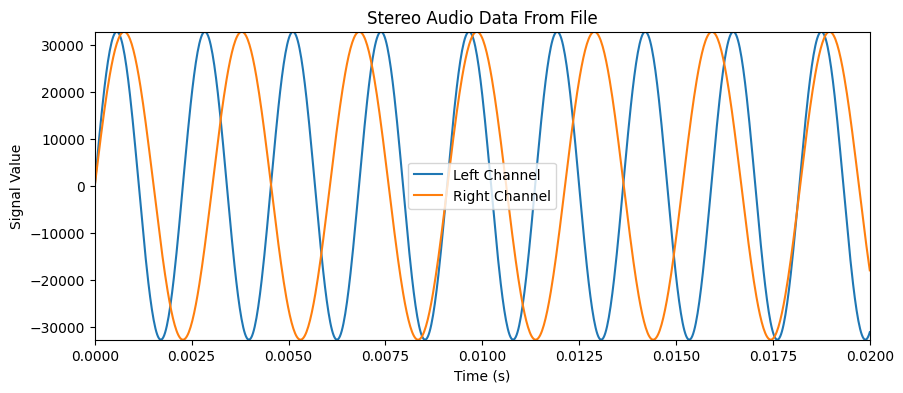

In [40]:
plt.figure(figsize=(10, 4))
plt.plot(times, l_channel, label='Left Channel')
plt.plot(times, r_channel, label='Right Channel')
plt.title('Stereo Audio Data From File')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.legend()
plt.axis([0, 1/50, -32768.0, 32767.0])

In [41]:
ipd.display(ipd.Audio(data=[l_channel, r_channel], rate=framerate))